In [1]:
import numpy as np
import matplotlib.pyplot as pp
import pandas as pd
import zipfile
import seaborn

In [2]:
%matplotlib inline

In [3]:
zipfile.ZipFile('names.zip').extractall('.')

In [6]:
names_all = []

# ambil semua data dari list names_all
for year in range(1880,2014+1):
    names_all.append(pd.read_csv('names/yob{}.txt'.format(year),names=['name','sex','number'])) # menambah kolom untuk tahun
    names_all[-1]['year'] = year

allyears = pd.concat(names_all)
allyears.head()

,name,sex,number,year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880


In [8]:
allyears_indexed = allyears.set_index(['sex','name','year']).sort_index()
allyears_indexed

number
sex name      year        
F   Aabha     2011       7
              2012       5
              2014       9
    Aabriella 2008       5
              2014       5
...                    ...
M   Zytavious 2009       7
              2010       6
    Zyvion    2009       5
    Zyyon     2014       6
    Zzyzx     2010       5

[1825433 rows x 1 columns]

In [9]:
# mengambil contoh nama Mary dengan jenis kelamin F sebagai perempuan 
allyears_indexed.loc['F','Mary']

,number
year,
1880,7065
1881,6919
1882,8148
1883,8012
1884,9217
...,...
2010,2862
2011,2701
2012,2565


In [10]:
def plotname(sex,name):
    data = allyears_indexed.loc[sex,name]
    
    pp.plot(data.index,data.values)

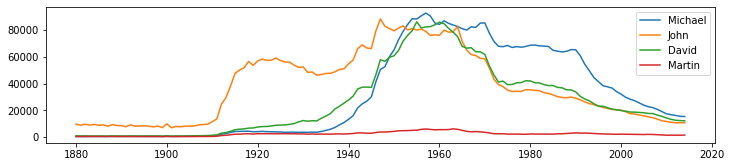

In [11]:
pp.figure(figsize=(12,2.5))

names = ['Michael','John','David','Martin']

for name in names:
    plotname('M',name)

pp.legend(names)

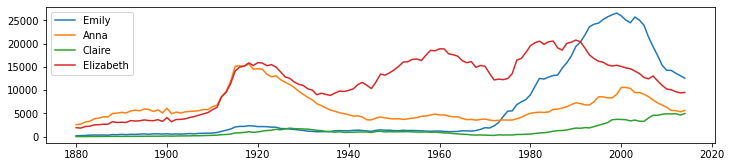

In [12]:
pp.figure(figsize=(12,2.5))

names = ['Emily','Anna','Claire','Elizabeth']

for name in names:
    plotname('F',name)

pp.legend(names)

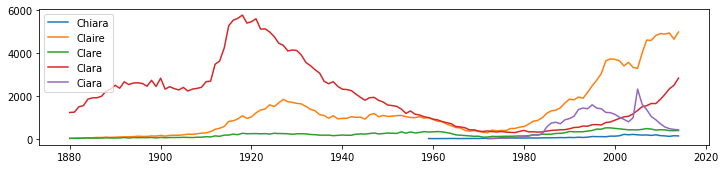

In [13]:
pp.figure(figsize=(12,2.5))

names = ['Chiara','Claire','Clare','Clara','Ciara']

for name in names:
    plotname('F',name)

pp.legend(names)

In [14]:
allyears_indexed.loc['F'].loc[names].head()

number
name   year        
Chiara 1959       9
       1960       5
       1962       8
       1963       8
       1964      12

In [15]:
allyears_indexed.loc['F'].loc[names].unstack(level=0).head()

number                           
name Chiara Claire Clare   Clara Ciara
year                                  
1880    NaN   21.0  15.0  1226.0   NaN
1881    NaN   23.0  20.0  1242.0   NaN
1882    NaN   30.0  21.0  1490.0   NaN
1883    NaN   38.0  22.0  1548.0   NaN
1884    NaN   33.0  38.0  1852.0   NaN

In [16]:
allyears_indexed.loc['F'].loc[names].unstack(level=0).fillna(0).head()

number                           
name Chiara Claire Clare   Clara Ciara
year                                  
1880    0.0   21.0  15.0  1226.0   0.0
1881    0.0   23.0  20.0  1242.0   0.0
1882    0.0   30.0  21.0  1490.0   0.0
1883    0.0   38.0  22.0  1548.0   0.0
1884    0.0   33.0  38.0  1852.0   0.0

In [21]:
variants = allyears_indexed.loc['F'].loc[names].unstack(level=0).fillna(0)

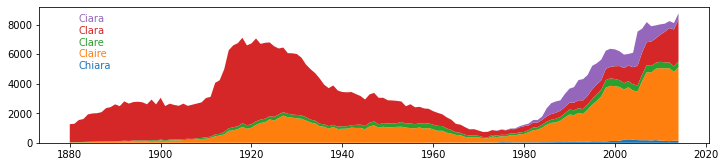

In [23]:
pp.figure(figsize=(12,2.5))

palette = seaborn.color_palette()
pp.stackplot(variants.index,variants.values.T,colors=palette)

for i,name in enumerate(names):
    pp.text(1882,5000 + 800*i,name,color=palette[i])